In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import requests as r
from math import sin, cos, sqrt, atan2, radians
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector, RFECV
from scipy import stats
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
import pickle
import warnings
warnings.filterwarnings('ignore')

random_state=42
num_samples = 75000
itr = 50

start_time = datetime.now()
print('Time: {}'.format(start_time))

Time: 2022-12-03 22:16:14.838666


In [2]:
url = 'https://envera-consulting-public-assets.s3.us-west-1.amazonaws.com/ssie-637-final-dataset.csv'
df = pd.read_csv(url)

In [3]:
df.shape

(69073, 32)

In [4]:
sub_list = ['hour', 'Call Priority', 'delta_1_min',
            'delta_2_min', 'delta_3_min',
            'delta_4_min', 'delta_5_min',
            'delta_6_min', 'delta_7_min',
            'distance_km', 'Rescue Squad Number']

sub_list2 = ['delta_1_min',
            'delta_2_min', 'delta_3_min',
            'delta_4_min', 'delta_5_min',
            'delta_6_min', 'delta_7_min',
            'distance_km']

In [5]:
new_df2 = df[sub_list]

In [6]:
new_df2.head(2)

,hour,Call Priority,delta_1_min,delta_2_min,delta_3_min,delta_4_min,delta_5_min,delta_6_min,delta_7_min,distance_km,Rescue Squad Number
0,6,1,1.850000,1.100000,2.733333,5.65,62.316667,11.333333,2.95,3.550461,R02
1,17,2,1.166667,0.183333,3.016667,3.80,60.850000,8.166667,1.35,3.550461,L11


In [7]:
Q1 = new_df2[sub_list2].quantile(0.25) 
Q3 = new_df2[sub_list2].quantile(0.75)
IQR = Q3 - Q1
condition = ~((new_df2[sub_list2] < (Q1 - 1.5 * IQR)) | (new_df2[sub_list2] > (Q3 + 1.5 * IQR))).any(axis=1)

new_df2 = new_df2[condition]

In [8]:
new_df2.shape

(55708, 11)

In [9]:
new_df2.describe()

,hour,Call Priority,delta_1_min,delta_2_min,delta_3_min,delta_4_min,delta_5_min,delta_6_min,delta_7_min,distance_km
count,55708.000000,55708.000000,55708.000000,55708.000000,55708.000000,55708.000000,55708.000000,55708.000000,55708.000000,55708.000000
mean,12.711424,1.262117,1.454727,0.569621,0.840678,4.861411,60.573323,7.726437,2.024348,5.977064
std,6.183895,0.455824,0.728115,0.334397,0.612458,2.452944,26.068367,2.837925,0.807573,4.011997
min,0.000000,1.000000,-0.383333,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.270028
25%,9.000000,1.000000,0.966667,0.316667,0.333333,3.216667,45.050000,5.883333,1.483333,3.550461
50%,13.000000,1.000000,1.400000,0.500000,0.750000,4.516667,63.400000,7.416667,1.983333,3.550461
75%,18.000000,2.000000,1.916667,0.750000,1.216667,6.216667,77.987500,9.350000,2.550000,8.890338
max,23.000000,4.000000,3.500000,1.600000,2.750000,12.166667,130.233333,16.750000,4.566667,17.711837


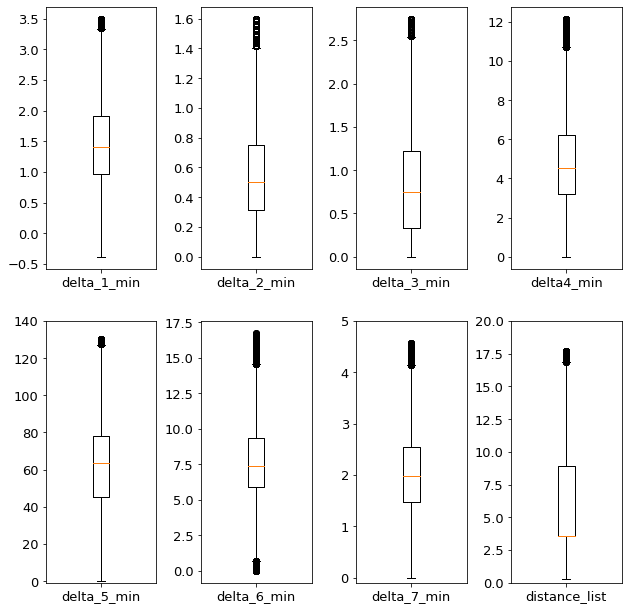

In [10]:
delta_1_min_list = new_df2['delta_1_min'].values.tolist()
delta_2_min_list = new_df2['delta_2_min'].values.tolist()
delta_3_min_list = new_df2['delta_3_min'].values.tolist()
delta_4_min_list = new_df2['delta_4_min'].values.tolist()
delta_5_min_list = new_df2['delta_5_min'].values.tolist()
delta_6_min_list = new_df2['delta_6_min'].values.tolist()
delta_7_min_list = new_df2['delta_7_min'].values.tolist()
hour_list = new_df2['hour'].values.tolist()
priority_list = new_df2['Call Priority'].values.tolist()
distance_list = new_df2['distance_km'].values.tolist()


plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.2)
num_rows = 2
num_col = 4
rotation = 0
fontsize = 13

plt.subplot(num_rows,num_col,1)
plt.boxplot([delta_1_min_list])
plt.xticks([1], ['delta_1_min'], fontsize=fontsize, rotation=rotation)
plt.yticks(fontsize=13)


plt.subplot(num_rows,num_col,2)
plt.boxplot([delta_2_min_list])
plt.xticks([1], ['delta_2_min'], fontsize=fontsize, rotation=rotation)
plt.yticks(fontsize=13)

plt.subplot(num_rows,num_col,3)
plt.boxplot([delta_3_min_list])
plt.xticks([1], ['delta_3_min'], fontsize=fontsize, rotation=rotation)
plt.yticks(fontsize=13)

plt.subplot(num_rows,num_col,4)
plt.boxplot([delta_4_min_list])
plt.xticks([1], ['delta4_min'], fontsize=fontsize, rotation=rotation)
plt.yticks(fontsize=13)

plt.subplot(num_rows,num_col,5)
plt.boxplot([delta_5_min_list])
plt.xticks([1], ['delta_5_min'], fontsize=fontsize, rotation=rotation)
plt.ylim(-0.9, 140, 20)
plt.yticks(fontsize=13)

plt.subplot(num_rows,num_col,6)
plt.boxplot([delta_6_min_list])
plt.xticks([1], ['delta_6_min'], fontsize=fontsize, rotation=rotation)
plt.yticks(fontsize=13)

plt.subplot(num_rows,num_col,7)
plt.boxplot([delta_7_min_list])
plt.xticks([1], ['delta_7_min'], fontsize=fontsize, rotation=rotation)
plt.ylim(-0.1, 5, 1)
plt.yticks(fontsize=13)


plt.subplot(num_rows,num_col,8)
plt.boxplot([distance_list])
plt.xticks([1], ['distance_list'], fontsize=fontsize, rotation=rotation)
plt.yticks(fontsize=13)
plt.ylim(0, 20, 2)


plt.show()

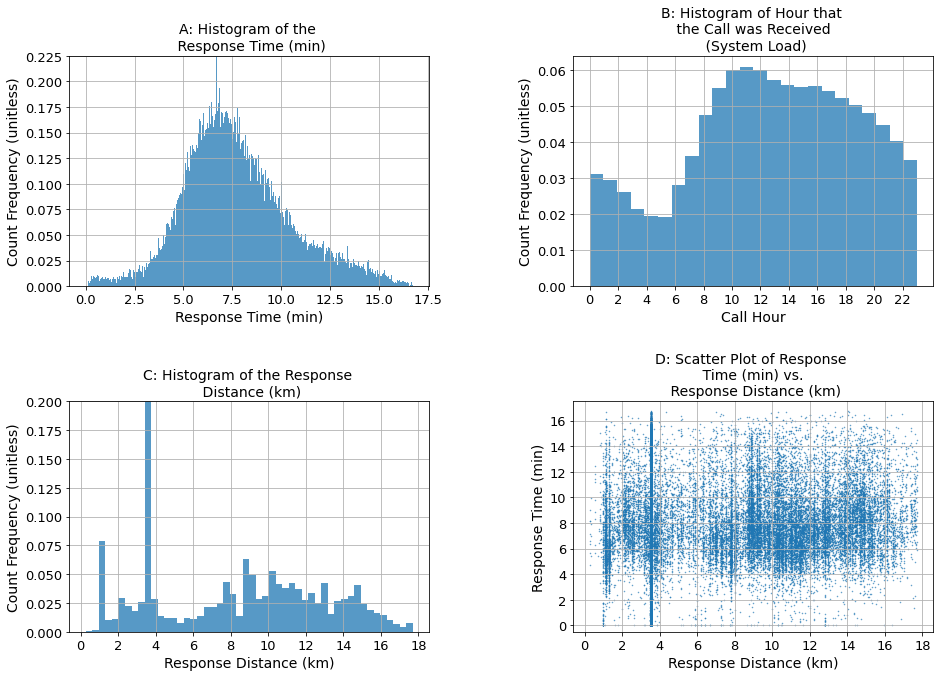

In [11]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.5)

plt.subplot(2,2,1)
plt.hist(delta_6_min_list, bins=500, density=True, alpha=0.75)
plt.xlabel('Response Time (min)', fontsize=14)
plt.ylabel('Count Frequency (unitless)', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(0, 0.225)
plt.grid(True)
plt.title('A: Histogram of the \n Response Time (min)', fontsize=14)

plt.subplot(2,2,2)
plt.hist(hour_list, density=True, bins=24, alpha=0.75)
plt.ylabel('Count Frequency (unitless)', fontsize=14)
plt.xlabel('Call Hour', fontsize=14)
plt.xticks(np.arange(0, 24, step=2), fontsize=13) 
plt.yticks(fontsize=13)
plt.grid(True)
plt.title('B: Histogram of Hour that \n the Call was Received \n (System Load)', fontsize=14)

plt.subplot(2,2,3)
plt.hist(distance_list, density=True, bins=50, alpha=0.75)
plt.xlabel('Response Distance (km)', fontsize=14)
plt.ylabel('Count Frequency (unitless)', fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(np.arange(0, 20, step=2), fontsize=13) 
plt.ylim(0, 0.2)
plt.grid(True)
plt.title('C: Histogram of the Response \n Distance (km)', fontsize=14)

plt.subplot(2,2,4)
x_log = [np.log(each) for each in distance_list]
y_log = [np.log(each) for each in delta_6_min_list]
x = distance_list
y = delta_6_min_list
plt.scatter(x=x, y=y, alpha=0.75, s = 0.25)
plt.xlabel('Response Distance (km)', fontsize=14)
plt.ylabel('Response Time (min)', fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(np.arange(0, 20, step=2), fontsize=13) 
plt.ylim(-0.5, 17.5)
plt.title('D: Scatter Plot of Response \n Time (min) vs. \n Response Distance (km)', fontsize=14)

plt.grid(True)
plt.savefig('figure_01.png')

plt.show()

In [12]:
col_sub1 = ['Rescue Squad Number', 'Call Priority', 'hour', 'delta_1_min', 'delta_2_min',
           'delta_3_min', 'delta_4_min', 'delta_5_min', 'delta_6_min', 
           'delta_7_min', 'distance_km']

col_sub2 = ['delta_6_min', 'hour', 'distance_km', 'Rescue Squad Number', 'Call Priority']

col_sub3 = ['delta_6_min', 'Call Priority']

col_sub4 = ['delta_6_min', 'hour']

col_sub5 = ['delta_6_min', 'Rescue Squad Number']

col_sub6 = ['delta_6_min', 'distance_km']

In [13]:
final_df1 = new_df2[col_sub1]
final_df1.head()

,Rescue Squad Number,Call Priority,hour,delta_1_min,delta_2_min,delta_3_min,delta_4_min,delta_5_min,delta_6_min,delta_7_min,distance_km
0,R02,1,6,1.850000,1.100000,2.733333,5.650000,62.316667,11.333333,2.95,3.550461
2,R19,1,8,1.633333,0.866667,0.833333,4.883333,49.533333,8.216667,2.50,14.913509
3,R14,1,19,1.400000,0.450000,0.733333,3.416667,71.483333,6.000000,1.85,3.322459
4,R02,1,19,1.433333,0.516667,1.500000,10.700000,31.533333,14.150000,1.95,3.550461
6,R02,1,9,0.950000,0.350000,0.933333,2.433333,74.366667,4.666667,1.30,10.985953


In [14]:
final_df2 = new_df2[col_sub2]
final_df2.head()

,delta_6_min,hour,distance_km,Rescue Squad Number,Call Priority
0,11.333333,6,3.550461,R02,1
2,8.216667,8,14.913509,R19,1
3,6.000000,19,3.322459,R14,1
4,14.150000,19,3.550461,R02,1
6,4.666667,9,10.985953,R02,1


In [15]:
final_df3 = new_df2[col_sub3]
final_df3.head()

,delta_6_min,Call Priority
0,11.333333,1
2,8.216667,1
3,6.000000,1
4,14.150000,1
6,4.666667,1


In [16]:
final_df4 = new_df2[col_sub4]
final_df4.head()

,delta_6_min,hour
0,11.333333,6
2,8.216667,8
3,6.000000,19
4,14.150000,19
6,4.666667,9


In [17]:
final_df5 = new_df2[col_sub5]
final_df5.head()

,delta_6_min,Rescue Squad Number
0,11.333333,R02
2,8.216667,R19
3,6.000000,R14
4,14.150000,R02
6,4.666667,R02


In [18]:
final_df6 = new_df2[col_sub6]
final_df6.head()

,delta_6_min,distance_km
0,11.333333,3.550461
2,8.216667,14.913509
3,6.000000,3.322459
4,14.150000,3.550461
6,4.666667,10.985953


In [19]:
one = OneHotEncoder()
std = StandardScaler()

#final_df1
col_transform_1 = make_column_transformer(
    (one, ['Rescue Squad Number', 'Call Priority', 'hour']),
    (std, ['distance_km', 'delta_1_min', 'delta_2_min', 'delta_3_min', 
            'delta_4_min', 'delta_5_min', 'delta_7_min', 'delta_6_min']),
    remainder='passthrough')

#final_df2
col_transform_2 = make_column_transformer(
    (one, ['hour', 'Call Priority', 'Rescue Squad Number']),
    (std, ['distance_km', 'delta_6_min']),
    remainder='passthrough')

#final_df3
col_transform_3 = make_column_transformer(
    (one, ['Call Priority']),
    (std, ['delta_6_min']),
    remainder='passthrough')

#final_df4
col_transform_4 = make_column_transformer(
    (one, ['hour']),
    (std, ['delta_6_min']),
    remainder='passthrough')

#final_df5
col_transform_5 = make_column_transformer(
    (one, ['Rescue Squad Number']),
    (std, ['delta_6_min']),
    remainder='passthrough')

#final_df6
col_transform_6 = make_column_transformer(
    (std, ['distance_km', 'delta_6_min']),
    remainder='passthrough')

In [20]:
data_dict = [{'col_transform': [{'data': final_df1, 'transformer': col_transform_1, 'dataset': 'dataset_1'}]},
             {'col_transform': [{'data': final_df2, 'transformer': col_transform_2, 'dataset': 'dataset_2'}]},
             {'col_transform': [{'data': final_df3, 'transformer': col_transform_3, 'dataset': 'dataset_3'}]},
             {'col_transform': [{'data': final_df4, 'transformer': col_transform_4, 'dataset': 'dataset_4'}]},
             {'col_transform': [{'data': final_df5, 'transformer': col_transform_5, 'dataset': 'dataset_5'}]},
             {'col_transform': [{'data': final_df6, 'transformer': col_transform_6, 'dataset': 'dataset_6'}]}]

In [21]:
pickle.dump(data_dict, open('data_dict.pkl', 'wb'))

In [22]:
dataset = []
except_list = []
for idx, each_trans in enumerate(data_dict):
    trans = each_trans['col_transform'][0]['transformer']
    data = each_trans['col_transform'][0]['data']
    name_str = each_trans['col_transform'][0]['dataset']
    try:
        data_transformed = trans.fit_transform(data)
        dense_array = data_transformed.toarray()
        
        feat_pos = len(dense_array[0]) -1
        X = dense_array[:,:feat_pos]
        y = dense_array[:, -1:]

        elm_dict = {
            'dataset': name_str,
            'data': [{'X': X, 'y': y}],
            'num_features': len(X)
        }
        dataset.append(elm_dict)
        
    except:
        except_list.append(idx)
        data_transformed = trans.fit_transform(data)
        X = data_transformed[:, 1:]
        y = data_transformed[:, :1]

        elm_dict = {
            'dataset': name_str,
            'data': [{'X': X, 'y': y}],
            'num_features': len(X)
        }
        dataset.append(elm_dict)

In [23]:
def train_func(dataset=None, model=None, test_size=None, random_state=None, run=None):
    
    df_list = []
    
    for idx, each in enumerate(dataset):
        
        X_train, X_test, y_train, y_test = train_test_split(each['data'][0]['X'], 
                                                            each['data'][0]['y'], 
                                                            test_size=test_size, 
                                                            random_state=random_state)
        reg = model.fit(X_train, y_train)
        y_pred_time = reg.predict(X_test)
        
        r2 = r2_score(y_test, y_pred_time)
        mse = mean_squared_error(y_test, y_pred_time)
        mae = mean_absolute_error(y_test, y_pred_time)
        rmse = np.sqrt(mse)
        rmsle = np.log(rmse)

        print('')
        print('-----------------')
        print('Time: {}'.format(datetime.now()))
        print('Dataset: {}, Model: {}, R2_Score: {:.5f}, MSE_Score: {:.5f}, MAE_Score: {:.5f}, RMSE_Score: {:.5f}, Shape: {}'.format(each['dataset'], 
                                                            model, r2, mse, mae, rmse, X_train.shape))
        print('Time: {}'.format(datetime.now()))
   
        cv = KFold(n_splits=5, 
                   shuffle=True, 
                   random_state=random_state)
    
        cv_scores = cross_val_score(estimator=model, 
                                 X=each['data'][0]['X'], 
                                 y=each['data'][0]['y'], 
                                 scoring=None, 
                                 cv=cv)
        print('')
        print('******* 10-Fold Cross Validation Scores *******')
        print('Time: {}'.format(datetime.now()))
        print('Dataset: {}, Model: {}, Mean_Score (Default): {:.5f}, Min_Score: {:.5f} Max_Score: {:.5f}, List of CV Scores: {}'.format(each['dataset'], 
                                                                                                     model,
                                                                                                     np.mean(cv_scores), 
                                                                                                     cv_scores.min(), 
                                                                                                     cv_scores.max(), 
                                                                                                     cv_scores))
        print('Time: {}'.format(datetime.now()))
        
        d = each['dataset']
        m = model
        s = test_size
        
        filename = 'run' + '_' + str(run) + '_' + str(d) +  '_model.pkl'
        pickle.dump(reg, open(filename, 'wb'))
        
        print('Saved pkl file for {}'.format(filename))
        
        
        df = pd.DataFrame({'model': [m for each in range(10)],
                           'dataset': [d for each in range(10)],
                           'testsize': [s for each in range(10)],
                           'metric_set': ['Non-CV', 'Non-CV', 'Non-CV', 'Non-CV', 'Non-CV', 'Non-CV', '10 Fold-CV', '10 Fold-CV', '10 Fold-CV', '10 Fold-CV'],
                           'metric': ['Shape', 'R2_Score', 'MSE_Score', 'MAE_Score', 'RMSE_Score', 'RMSLE_Score', 'Mean_Score', 'Min_Score', 'Max_Score', 'cv_scores'], 
                           'value': [X_train.shape, r2, mse, mae, rmse, rmsle, np.mean(cv_scores), cv_scores.min(), cv_scores.max(), cv_scores]})   
        
        df_list.append(df)
        
    return pd.concat(df_list)
        

In [24]:
pickle.dump(dataset, open('dataset.pkl', 'wb'))

In [25]:
model = LinearRegression()
run1 = train_func(dataset=dataset, model=model, test_size=0.3, random_state=random_state, run=1)


-----------------
Time: 2022-12-03 22:16:52.131324
Dataset: dataset_1, Model: LinearRegression(), R2_Score: 1.00000, MSE_Score: 0.00000, MAE_Score: 0.00000, RMSE_Score: 0.00021, Shape: (38995, 529)
Time: 2022-12-03 22:16:52.132591

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:16:57.466370
Dataset: dataset_1, Model: LinearRegression(), Mean_Score (Default): 0.99999, Min_Score: 0.99996 Max_Score: 1.00000, List of CV Scores: [0.99999998 0.99996426 1.         0.99999998 0.9999999 ]
Time: 2022-12-03 22:16:57.467343
Saved pkl file for run_1_dataset_1_model.pkl

-----------------
Time: 2022-12-03 22:16:58.373469
Dataset: dataset_2, Model: LinearRegression(), R2_Score: -354041125713745215488.00000, MSE_Score: 352805821914042990592.00000, MAE_Score: 691525913.37540, RMSE_Score: 18783125988.87744, Shape: (38995, 523)
Time: 2022-12-03 22:16:58.373833

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:17:02.868675
Dataset: dataset_2, Model: LinearRegressio

In [26]:
model = LinearRegression()
run2 = train_func(dataset=dataset, model=model, test_size=0.5, random_state=random_state, run=2)


-----------------
Time: 2022-12-03 22:17:08.837135
Dataset: dataset_1, Model: LinearRegression(), R2_Score: 0.99969, MSE_Score: 0.00031, MAE_Score: 0.00038, RMSE_Score: 0.01766, Shape: (27854, 529)
Time: 2022-12-03 22:17:08.837688

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:17:12.984138
Dataset: dataset_1, Model: LinearRegression(), Mean_Score (Default): 0.99999, Min_Score: 0.99996 Max_Score: 1.00000, List of CV Scores: [0.99999998 0.99996426 1.         0.99999998 0.9999999 ]
Time: 2022-12-03 22:17:12.984480
Saved pkl file for run_2_dataset_1_model.pkl

-----------------
Time: 2022-12-03 22:17:13.710447
Dataset: dataset_2, Model: LinearRegression(), R2_Score: -39066346922063265792.00000, MSE_Score: 39011182428913827840.00000, MAE_Score: 283532269.88809, RMSE_Score: 6245893245.07823, Shape: (27854, 523)
Time: 2022-12-03 22:17:13.710623

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:17:17.960777
Dataset: dataset_2, Model: LinearRegression()

In [27]:
model = LinearRegression()
run3 = train_func(dataset=dataset, model=model, test_size=0.7, random_state=random_state, run=3)


-----------------
Time: 2022-12-03 22:17:23.111281
Dataset: dataset_1, Model: LinearRegression(), R2_Score: 1.00000, MSE_Score: 0.00000, MAE_Score: 0.00013, RMSE_Score: 0.00180, Shape: (16712, 529)
Time: 2022-12-03 22:17:23.111455

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:17:27.912370
Dataset: dataset_1, Model: LinearRegression(), Mean_Score (Default): 0.99999, Min_Score: 0.99996 Max_Score: 1.00000, List of CV Scores: [0.99999998 0.99996426 1.         0.99999998 0.9999999 ]
Time: 2022-12-03 22:17:27.912796
Saved pkl file for run_3_dataset_1_model.pkl

-----------------
Time: 2022-12-03 22:17:28.572667
Dataset: dataset_2, Model: LinearRegression(), R2_Score: -12069782877854164992.00000, MSE_Score: 12014524922968965120.00000, MAE_Score: 121315327.71939, RMSE_Score: 3466197473.16407, Shape: (16712, 523)
Time: 2022-12-03 22:17:28.572875

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:17:32.993751
Dataset: dataset_2, Model: LinearRegression()

In [28]:
model = LinearRegression()
run4 = train_func(dataset=dataset, model=model, test_size=0.8, random_state=random_state, run=4)


-----------------
Time: 2022-12-03 22:17:37.772795
Dataset: dataset_1, Model: LinearRegression(), R2_Score: 1.00000, MSE_Score: 0.00000, MAE_Score: 0.00010, RMSE_Score: 0.00186, Shape: (11141, 529)
Time: 2022-12-03 22:17:37.772964

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:17:42.003988
Dataset: dataset_1, Model: LinearRegression(), Mean_Score (Default): 0.99999, Min_Score: 0.99996 Max_Score: 1.00000, List of CV Scores: [0.99999998 0.99996426 1.         0.99999998 0.9999999 ]
Time: 2022-12-03 22:17:42.004360
Saved pkl file for run_4_dataset_1_model.pkl

-----------------
Time: 2022-12-03 22:17:42.368752
Dataset: dataset_2, Model: LinearRegression(), R2_Score: -12760680749124523393024.00000, MSE_Score: 12723559728630231728128.00000, MAE_Score: 2677855816.98148, RMSE_Score: 112798757655.52664, Shape: (11141, 523)
Time: 2022-12-03 22:17:42.368933

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:17:46.711196
Dataset: dataset_2, Model: LinearReg

In [29]:
model = LinearRegression()
run5 = train_func(dataset=dataset, model=model, test_size=0.9, random_state=random_state, run=5)


-----------------
Time: 2022-12-03 22:17:51.280555
Dataset: dataset_1, Model: LinearRegression(), R2_Score: 1.00000, MSE_Score: 0.00000, MAE_Score: 0.00004, RMSE_Score: 0.00053, Shape: (5570, 529)
Time: 2022-12-03 22:17:51.280771

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:17:55.803847
Dataset: dataset_1, Model: LinearRegression(), Mean_Score (Default): 0.99999, Min_Score: 0.99996 Max_Score: 1.00000, List of CV Scores: [0.99999998 0.99996426 1.         0.99999998 0.9999999 ]
Time: 2022-12-03 22:17:55.804358
Saved pkl file for run_5_dataset_1_model.pkl

-----------------
Time: 2022-12-03 22:17:56.054331
Dataset: dataset_2, Model: LinearRegression(), R2_Score: -413845118003476562968576.00000, MSE_Score: 412720546785355672584192.00000, MAE_Score: 80862670826.31578, RMSE_Score: 642433301429.30457, Shape: (5570, 523)
Time: 2022-12-03 22:17:56.054522

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:18:00.552356
Dataset: dataset_2, Model: LinearRe

In [30]:
model = linear_model.Lasso(alpha=0.025, random_state=random_state)
run6 = train_func(dataset=dataset, model=model, test_size=0.3, random_state=random_state, run=6)


-----------------
Time: 2022-12-03 22:18:05.520950
Dataset: dataset_1, Model: Lasso(alpha=0.025, random_state=42), R2_Score: 0.99843, MSE_Score: 0.00157, MAE_Score: 0.03102, RMSE_Score: 0.03958, Shape: (38995, 529)
Time: 2022-12-03 22:18:05.521224

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:18:08.168583
Dataset: dataset_1, Model: Lasso(alpha=0.025, random_state=42), Mean_Score (Default): 0.99843, Min_Score: 0.99840 Max_Score: 0.99845, List of CV Scores: [0.99845113 0.99840487 0.99845377 0.99842618 0.99843842]
Time: 2022-12-03 22:18:08.168953
Saved pkl file for run_6_dataset_1_model.pkl

-----------------
Time: 2022-12-03 22:18:08.586994
Dataset: dataset_2, Model: Lasso(alpha=0.025, random_state=42), R2_Score: 0.16758, MSE_Score: 0.82952, MAE_Score: 0.69771, RMSE_Score: 0.91078, Shape: (38995, 523)
Time: 2022-12-03 22:18:08.587248

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:18:10.693818
Dataset: dataset_2, Model: Lasso(alpha=0.025, rand

In [31]:
model = linear_model.Lasso(alpha=0.050, random_state=random_state)
run13 = train_func(dataset=dataset, model=model, test_size=0.3, random_state=random_state, run=13)


-----------------
Time: 2022-12-03 22:18:13.021656
Dataset: dataset_1, Model: Lasso(alpha=0.05, random_state=42), R2_Score: 0.99371, MSE_Score: 0.00627, MAE_Score: 0.06205, RMSE_Score: 0.07917, Shape: (38995, 529)
Time: 2022-12-03 22:18:13.022111

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:18:15.305644
Dataset: dataset_1, Model: Lasso(alpha=0.05, random_state=42), Mean_Score (Default): 0.99374, Min_Score: 0.99362 Max_Score: 0.99382, List of CV Scores: [0.99380413 0.99362032 0.99381571 0.99370551 0.99375478]
Time: 2022-12-03 22:18:15.306010
Saved pkl file for run_13_dataset_1_model.pkl

-----------------
Time: 2022-12-03 22:18:15.651314
Dataset: dataset_2, Model: Lasso(alpha=0.05, random_state=42), R2_Score: 0.15422, MSE_Score: 0.84283, MAE_Score: 0.70448, RMSE_Score: 0.91806, Shape: (38995, 523)
Time: 2022-12-03 22:18:15.651705

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:18:17.502638
Dataset: dataset_2, Model: Lasso(alpha=0.05, random_

In [32]:
model = linear_model.Lasso(alpha=0.075, random_state=random_state)
run14 = train_func(dataset=dataset, model=model, test_size=0.3, random_state=random_state, run=14)


-----------------
Time: 2022-12-03 22:18:19.692436
Dataset: dataset_1, Model: Lasso(alpha=0.075, random_state=42), R2_Score: 0.98585, MSE_Score: 0.01410, MAE_Score: 0.09307, RMSE_Score: 0.11875, Shape: (38995, 529)
Time: 2022-12-03 22:18:19.692660

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:18:21.774125
Dataset: dataset_1, Model: Lasso(alpha=0.075, random_state=42), Mean_Score (Default): 0.98592, Min_Score: 0.98564 Max_Score: 0.98609, List of CV Scores: [0.98606088 0.98564498 0.98608523 0.98583707 0.98594835]
Time: 2022-12-03 22:18:21.774510
Saved pkl file for run_14_dataset_1_model.pkl

-----------------
Time: 2022-12-03 22:18:22.167993
Dataset: dataset_2, Model: Lasso(alpha=0.075, random_state=42), R2_Score: 0.13279, MSE_Score: 0.86418, MAE_Score: 0.71460, RMSE_Score: 0.92961, Shape: (38995, 523)
Time: 2022-12-03 22:18:22.168355

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:18:23.930008
Dataset: dataset_2, Model: Lasso(alpha=0.075, ran

In [33]:
model = linear_model.Lasso(alpha=0.1, random_state=random_state)
run15 = train_func(dataset=dataset, model=model, test_size=0.3, random_state=random_state, run=15)


-----------------
Time: 2022-12-03 22:18:26.192692
Dataset: dataset_1, Model: Lasso(alpha=0.1, random_state=42), R2_Score: 0.97484, MSE_Score: 0.02507, MAE_Score: 0.12409, RMSE_Score: 0.15833, Shape: (38995, 529)
Time: 2022-12-03 22:18:26.192955

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:18:28.299071
Dataset: dataset_1, Model: Lasso(alpha=0.1, random_state=42), Mean_Score (Default): 0.97496, Min_Score: 0.97448 Max_Score: 0.97526, List of CV Scores: [0.97521944 0.97448113 0.97526272 0.97482192 0.97501862]
Time: 2022-12-03 22:18:28.299468
Saved pkl file for run_15_dataset_1_model.pkl

-----------------
Time: 2022-12-03 22:18:28.635102
Dataset: dataset_2, Model: Lasso(alpha=0.1, random_state=42), R2_Score: 0.10517, MSE_Score: 0.89171, MAE_Score: 0.72731, RMSE_Score: 0.94430, Shape: (38995, 523)
Time: 2022-12-03 22:18:28.635535

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:18:30.389568
Dataset: dataset_2, Model: Lasso(alpha=0.1, random_stat

In [34]:
model = linear_model.Lasso(alpha=0.5, random_state=random_state)
run16 = train_func(dataset=dataset, model=model, test_size=0.3, random_state=random_state, run=16)


-----------------
Time: 2022-12-03 22:18:33.103460
Dataset: dataset_1, Model: Lasso(alpha=0.5, random_state=42), R2_Score: 0.62518, MSE_Score: 0.37351, MAE_Score: 0.47506, RMSE_Score: 0.61116, Shape: (38995, 529)
Time: 2022-12-03 22:18:33.103719

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:18:34.787511
Dataset: dataset_1, Model: Lasso(alpha=0.5, random_state=42), Mean_Score (Default): 0.62490, Min_Score: 0.62366 Max_Score: 0.62700, List of CV Scores: [0.62699512 0.62366316 0.62516449 0.62439708 0.62425813]
Time: 2022-12-03 22:18:34.787905
Saved pkl file for run_16_dataset_1_model.pkl

-----------------
Time: 2022-12-03 22:18:35.087311
Dataset: dataset_2, Model: Lasso(alpha=0.5, random_state=42), R2_Score: -0.00001, MSE_Score: 0.99652, MAE_Score: 0.77266, RMSE_Score: 0.99826, Shape: (38995, 523)
Time: 2022-12-03 22:18:35.087508

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:18:36.658204
Dataset: dataset_2, Model: Lasso(alpha=0.5, random_sta

In [35]:
model = linear_model.Lasso(alpha=0.75, random_state=random_state)
run17 = train_func(dataset=dataset, model=model, test_size=0.3, random_state=random_state, run=17)


-----------------
Time: 2022-12-03 22:18:38.765630
Dataset: dataset_1, Model: Lasso(alpha=0.75, random_state=42), R2_Score: 0.31434, MSE_Score: 0.68327, MAE_Score: 0.64019, RMSE_Score: 0.82660, Shape: (38995, 529)
Time: 2022-12-03 22:18:38.765874

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:18:40.379036
Dataset: dataset_1, Model: Lasso(alpha=0.75, random_state=42), Mean_Score (Default): 0.31236, Min_Score: 0.30914 Max_Score: 0.31415, List of CV Scores: [0.3141526  0.3134813  0.31205951 0.31298584 0.30914008]
Time: 2022-12-03 22:18:40.379646
Saved pkl file for run_17_dataset_1_model.pkl

-----------------
Time: 2022-12-03 22:18:40.692705
Dataset: dataset_2, Model: Lasso(alpha=0.75, random_state=42), R2_Score: -0.00001, MSE_Score: 0.99652, MAE_Score: 0.77266, RMSE_Score: 0.99826, Shape: (38995, 523)
Time: 2022-12-03 22:18:40.692928

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:18:42.330460
Dataset: dataset_2, Model: Lasso(alpha=0.75, random

In [36]:
model = linear_model.Lasso(alpha=0.35, random_state=random_state)
run18 = train_func(dataset=dataset, model=model, test_size=0.3, random_state=random_state, run=18)


-----------------
Time: 2022-12-03 22:18:44.588976
Dataset: dataset_1, Model: Lasso(alpha=0.35, random_state=42), R2_Score: 0.75195, MSE_Score: 0.24719, MAE_Score: 0.38837, RMSE_Score: 0.49718, Shape: (38995, 529)
Time: 2022-12-03 22:18:44.589211

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:18:46.201224
Dataset: dataset_1, Model: Lasso(alpha=0.35, random_state=42), Mean_Score (Default): 0.75241, Min_Score: 0.75025 Max_Score: 0.75410, List of CV Scores: [0.75409831 0.75025267 0.75324712 0.75183981 0.75260206]
Time: 2022-12-03 22:18:46.201640
Saved pkl file for run_18_dataset_1_model.pkl

-----------------
Time: 2022-12-03 22:18:46.500588
Dataset: dataset_2, Model: Lasso(alpha=0.35, random_state=42), R2_Score: -0.00001, MSE_Score: 0.99652, MAE_Score: 0.77266, RMSE_Score: 0.99826, Shape: (38995, 523)
Time: 2022-12-03 22:18:46.500818

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:18:47.949136
Dataset: dataset_2, Model: Lasso(alpha=0.35, random

In [37]:
model = linear_model.Lasso(alpha=0, random_state=random_state)
run7 = train_func(dataset=dataset, model=model, test_size=0.3, random_state=random_state, run=7)


-----------------
Time: 2022-12-03 22:18:50.089655
Dataset: dataset_1, Model: Lasso(alpha=0, random_state=42), R2_Score: 1.00000, MSE_Score: 0.00000, MAE_Score: 0.00000, RMSE_Score: 0.00000, Shape: (38995, 529)
Time: 2022-12-03 22:18:50.089926

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:18:52.177076
Dataset: dataset_1, Model: Lasso(alpha=0, random_state=42), Mean_Score (Default): 1.00000, Min_Score: 1.00000 Max_Score: 1.00000, List of CV Scores: [1. 1. 1. 1. 1.]
Time: 2022-12-03 22:18:52.177477
Saved pkl file for run_7_dataset_1_model.pkl

-----------------
Time: 2022-12-03 22:19:05.491944
Dataset: dataset_2, Model: Lasso(alpha=0, random_state=42), R2_Score: 0.23274, MSE_Score: 0.76458, MAE_Score: 0.67034, RMSE_Score: 0.87440, Shape: (38995, 523)
Time: 2022-12-03 22:19:05.492163

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:20:40.918073
Dataset: dataset_2, Model: Lasso(alpha=0, random_state=42), Mean_Score (Default): 0.23076, Min_Score: 

In [38]:
model = linear_model.Lasso(alpha=1, random_state=random_state)
run8 = train_func(dataset=dataset, model=model, test_size=0.3, random_state=random_state, run=8)


-----------------
Time: 2022-12-03 22:22:36.906461
Dataset: dataset_1, Model: Lasso(alpha=1, random_state=42), R2_Score: -0.00001, MSE_Score: 0.99652, MAE_Score: 0.77266, RMSE_Score: 0.99826, Shape: (38995, 529)
Time: 2022-12-03 22:22:36.906847

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:22:38.574245
Dataset: dataset_1, Model: Lasso(alpha=1, random_state=42), Mean_Score (Default): -0.00009, Min_Score: -0.00019 Max_Score: -0.00001, List of CV Scores: [-8.35421901e-06 -2.18520968e-05 -1.75565895e-04 -4.98765809e-05
 -1.86905308e-04]
Time: 2022-12-03 22:22:38.574687
Saved pkl file for run_8_dataset_1_model.pkl

-----------------
Time: 2022-12-03 22:22:38.979521
Dataset: dataset_2, Model: Lasso(alpha=1, random_state=42), R2_Score: -0.00001, MSE_Score: 0.99652, MAE_Score: 0.77266, RMSE_Score: 0.99826, Shape: (38995, 523)
Time: 2022-12-03 22:22:38.979770

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:22:40.541246
Dataset: dataset_2, Model: Lass

In [39]:
model = Ridge(alpha=8, random_state=random_state)
run9 = train_func(dataset=dataset, model=model, test_size=0.3, random_state=random_state, run=9)


-----------------
Time: 2022-12-03 22:22:42.676320
Dataset: dataset_1, Model: Ridge(alpha=8, random_state=42), R2_Score: 1.00000, MSE_Score: 0.00000, MAE_Score: 0.00016, RMSE_Score: 0.00020, Shape: (38995, 529)
Time: 2022-12-03 22:22:42.676598

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:22:44.414771
Dataset: dataset_1, Model: Ridge(alpha=8, random_state=42), Mean_Score (Default): 1.00000, Min_Score: 1.00000 Max_Score: 1.00000, List of CV Scores: [0.99999997 0.99999997 0.99999997 0.99999997 0.99999997]
Time: 2022-12-03 22:22:44.415210
Saved pkl file for run_9_dataset_1_model.pkl

-----------------
Time: 2022-12-03 22:22:44.750397
Dataset: dataset_2, Model: Ridge(alpha=8, random_state=42), R2_Score: 0.23475, MSE_Score: 0.76258, MAE_Score: 0.67136, RMSE_Score: 0.87326, Shape: (38995, 523)
Time: 2022-12-03 22:22:44.750842

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:22:46.469251
Dataset: dataset_2, Model: Ridge(alpha=8, random_state=42), Me

In [40]:
model = Ridge(alpha=1, random_state=random_state)
run10 = train_func(dataset=dataset, model=model, test_size=0.3, random_state=random_state, run=10)


-----------------
Time: 2022-12-03 22:22:48.766831
Dataset: dataset_1, Model: Ridge(alpha=1, random_state=42), R2_Score: 1.00000, MSE_Score: 0.00000, MAE_Score: 0.00002, RMSE_Score: 0.00003, Shape: (38995, 529)
Time: 2022-12-03 22:22:48.767036

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:22:50.446455
Dataset: dataset_1, Model: Ridge(alpha=1, random_state=42), Mean_Score (Default): 1.00000, Min_Score: 1.00000 Max_Score: 1.00000, List of CV Scores: [1. 1. 1. 1. 1.]
Time: 2022-12-03 22:22:50.446902
Saved pkl file for run_10_dataset_1_model.pkl

-----------------
Time: 2022-12-03 22:22:50.777241
Dataset: dataset_2, Model: Ridge(alpha=1, random_state=42), R2_Score: 0.23729, MSE_Score: 0.76005, MAE_Score: 0.66984, RMSE_Score: 0.87181, Shape: (38995, 523)
Time: 2022-12-03 22:22:50.777461

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:22:52.409622
Dataset: dataset_2, Model: Ridge(alpha=1, random_state=42), Mean_Score (Default): 0.23583, Min_Score:

In [41]:
model = Ridge(alpha=5, random_state=random_state)
run11 = train_func(dataset=dataset, model=model, test_size=0.3, random_state=random_state, run=11)


-----------------
Time: 2022-12-03 22:22:54.573443
Dataset: dataset_1, Model: Ridge(alpha=5, random_state=42), R2_Score: 1.00000, MSE_Score: 0.00000, MAE_Score: 0.00010, RMSE_Score: 0.00013, Shape: (38995, 529)
Time: 2022-12-03 22:22:54.573648

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:22:56.279949
Dataset: dataset_1, Model: Ridge(alpha=5, random_state=42), Mean_Score (Default): 1.00000, Min_Score: 1.00000 Max_Score: 1.00000, List of CV Scores: [0.99999999 0.99999999 0.99999999 0.99999999 0.99999999]
Time: 2022-12-03 22:22:56.280290
Saved pkl file for run_11_dataset_1_model.pkl

-----------------
Time: 2022-12-03 22:22:56.597566
Dataset: dataset_2, Model: Ridge(alpha=5, random_state=42), R2_Score: 0.23611, MSE_Score: 0.76122, MAE_Score: 0.67090, RMSE_Score: 0.87248, Shape: (38995, 523)
Time: 2022-12-03 22:22:56.597751

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:22:58.263637
Dataset: dataset_2, Model: Ridge(alpha=5, random_state=42), M

In [42]:
model = ElasticNet(random_state=random_state)
run12 = train_func(dataset=dataset, model=model, test_size=0.3, random_state=random_state, run=12)


-----------------
Time: 2022-12-03 22:23:00.417229
Dataset: dataset_1, Model: ElasticNet(random_state=42), R2_Score: 0.45931, MSE_Score: 0.53880, MAE_Score: 0.56899, RMSE_Score: 0.73403, Shape: (38995, 529)
Time: 2022-12-03 22:23:00.417488

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:23:01.993876
Dataset: dataset_1, Model: ElasticNet(random_state=42), Mean_Score (Default): 0.45869, Min_Score: 0.45763 Max_Score: 0.46051, List of CV Scores: [0.46050726 0.45816483 0.45871849 0.45844609 0.45762896]
Time: 2022-12-03 22:23:01.994239
Saved pkl file for run_12_dataset_1_model.pkl

-----------------
Time: 2022-12-03 22:23:02.275822
Dataset: dataset_2, Model: ElasticNet(random_state=42), R2_Score: -0.00001, MSE_Score: 0.99652, MAE_Score: 0.77266, RMSE_Score: 0.99826, Shape: (38995, 523)
Time: 2022-12-03 22:23:02.276056

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:23:03.790938
Dataset: dataset_2, Model: ElasticNet(random_state=42), Mean_Score (Defa

In [43]:
model = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1, random_state=random_state)
run19 = train_func(dataset=dataset, model=model, test_size=0.3, random_state=random_state, run=19)


-----------------
Time: 2022-12-03 22:23:37.981549
Dataset: dataset_1, Model: GradientBoostingRegressor(random_state=42), R2_Score: 0.99858, MSE_Score: 0.00142, MAE_Score: 0.02909, RMSE_Score: 0.03768, Shape: (38995, 529)
Time: 2022-12-03 22:23:37.982018

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:26:46.382171
Dataset: dataset_1, Model: GradientBoostingRegressor(random_state=42), Mean_Score (Default): 0.99854, Min_Score: 0.99851 Max_Score: 0.99857, List of CV Scores: [0.99856636 0.99850985 0.99851334 0.99855091 0.99855918]
Time: 2022-12-03 22:26:46.382982
Saved pkl file for run_19_dataset_1_model.pkl

-----------------
Time: 2022-12-03 22:27:16.703230
Dataset: dataset_2, Model: GradientBoostingRegressor(random_state=42), R2_Score: 0.23421, MSE_Score: 0.76312, MAE_Score: 0.66790, RMSE_Score: 0.87357, Shape: (38995, 523)
Time: 2022-12-03 22:27:16.703962

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:30:16.954559
Dataset: dataset_2, Model: G

In [44]:
model = AdaBoostRegressor(n_estimators=100,learning_rate=0.1, random_state=random_state)
run20 = train_func(dataset=dataset, model=model, test_size=0.3, random_state=random_state, run=20)


-----------------
Time: 2022-12-03 22:34:19.282863
Dataset: dataset_1, Model: AdaBoostRegressor(learning_rate=0.1, n_estimators=100, random_state=42), R2_Score: 0.93055, MSE_Score: 0.06921, MAE_Score: 0.20825, RMSE_Score: 0.26307, Shape: (38995, 529)
Time: 2022-12-03 22:34:19.283132

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:37:56.326301
Dataset: dataset_1, Model: AdaBoostRegressor(learning_rate=0.1, n_estimators=100, random_state=42), Mean_Score (Default): 0.93080, Min_Score: 0.92889 Max_Score: 0.93326, List of CV Scores: [0.93043534 0.92888775 0.93326461 0.93015525 0.93127783]
Time: 2022-12-03 22:37:56.326909
Saved pkl file for run_20_dataset_1_model.pkl

-----------------
Time: 2022-12-03 22:38:26.036846
Dataset: dataset_2, Model: AdaBoostRegressor(learning_rate=0.1, n_estimators=100, random_state=42), R2_Score: 0.17977, MSE_Score: 0.81737, MAE_Score: 0.69630, RMSE_Score: 0.90408, Shape: (38995, 523)
Time: 2022-12-03 22:38:26.037064

******* 10-Fold Cross 

In [45]:
model = SVR()
run21 = train_func(dataset=dataset, model=model, test_size=0.3, random_state=random_state, run=21)


-----------------
Time: 2022-12-03 22:46:05.101334
Dataset: dataset_1, Model: SVR(), R2_Score: 0.99714, MSE_Score: 0.00285, MAE_Score: 0.04115, RMSE_Score: 0.05335, Shape: (38995, 529)
Time: 2022-12-03 22:46:05.101592

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 22:48:32.485527
Dataset: dataset_1, Model: SVR(), Mean_Score (Default): 0.99724, Min_Score: 0.99710 Max_Score: 0.99745, List of CV Scores: [0.99718734 0.99710466 0.9972054  0.99725727 0.99745359]
Time: 2022-12-03 22:48:32.486551
Saved pkl file for run_21_dataset_1_model.pkl

-----------------
Time: 2022-12-03 22:55:36.243864
Dataset: dataset_2, Model: SVR(), R2_Score: 0.24253, MSE_Score: 0.75483, MAE_Score: 0.65992, RMSE_Score: 0.86881, Shape: (38995, 523)
Time: 2022-12-03 22:55:36.244759

******* 10-Fold Cross Validation Scores *******
Time: 2022-12-03 23:36:48.168792
Dataset: dataset_2, Model: SVR(), Mean_Score (Default): 0.24188, Min_Score: 0.23685 Max_Score: 0.24647, List of CV Scores: [0.24338273 0.24

In [46]:
df_all_runs = pd.concat([run1, run2, run3, 
                         run4, run5, run6, 
                         run7, run8, run9, 
                         run10, run11, run12, 
                         run13, run14, run15, 
                         run16, run17, run18, 
                         run19, run20, run21])

In [47]:
df_all_runs.shape

(1260, 6)

In [48]:
df_all_runs.to_csv('modeling-output-final.csv', index=False)

In [49]:
end_time = datetime.now()
print('Time: {}'.format(datetime.now()))

Time: 2022-12-04 01:13:51.414358


In [50]:
time_delta = (end_time - start_time) / 60
print('Elapsed Time: {} min'.format(time_delta))

Elapsed Time: 0:02:57.609594 min
